In [122]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [139]:
with open("simulation/mutations.fa", "w") as f:
    f.write(">chr1\n")
    f.write(mutation)

In [129]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)

In [130]:
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]
mut_ratio = (F2_genotype == F2_genotype.iloc[0, :]).sum().values
print(list(mut_ratio).index(mut_ratio.max()))
mut_ind = list(mut_ratio).index(mut_ratio.max())
mut_ratio[list(mut_ratio).index(mut_ratio.max())]

19


66

In [131]:
with open("Cultivar.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [136]:
with open("F2_genome.fa", "w") as f:
    for i, key in enumerate((F2_genotype.iloc[1:, mut_ind] != F2_genotype.iloc[0, mut_ind]).values):
        if key:
            f.write(f">sample{i}\n")
            f.write(F2_seq[i])
            f.write("\n")

In [137]:
np.sort(mutate_positions)[mut_ind]

4369

In [ ]:
300 de wgsim -d 10 -1 20 -2 20 -N 150 CultivarB.fa Mutated_Cultivar_read.fastq Mutated_Cultivar_read2.fastq
3000   wgsim -d 100 -1 150 -2 150 -N 1500 F2_genome.fa bulked_1.fastq bulked_2.fastq

In [142]:
def simulate_fastq(F2_num):
    with open("genome/CultivarB.fa", mode="r") as f:
        ref = f.readlines()[1]
    with open("simulation/mutations.fa", mode="r") as f:
        mut = f.readlines()[1]

    F2_genotype = [list(reference)]
    F2_seq = []
    for i in range(F2_num):
        recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
        if random.randint(0, 9999) > 5000:
            new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
            reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
            reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
        else:
            new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
            mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
            mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
        F2_genotype.append(list(new_geno))
        F2_seq.append(new_geno)
        
        F2_genotype = pd.DataFrame(F2_genotype)
        F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != F2_num+1]
        
        with open("F2_genome.fa", "w") as f:
            for i, key in enumerate((F2_genotype.iloc[1:, 19] != F2_genotype.iloc[0, 19]).values):
                if key:
                    f.write(f">sample{i}\n")
                    f.write(F2_seq[i])
                    f.write("\n")

# QTLseq

(array([ 1.,  0.,  5.,  9.,  7.,  9., 11.,  3.,  4.,  1.]),
 array([-18.34816229, -14.98125904, -11.6143558 ,  -8.24745256,
         -4.88054931,  -1.51364607,   1.85325718,   5.22016042,
          8.58706366,  11.95396691,  15.32087015]),
 <BarContainer object of 10 artists>)

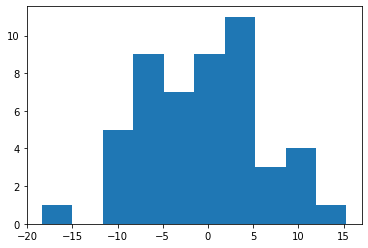

In [472]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 7
n_sample = 50
effects = np.random.normal(mu, sigma, n_sample)
plt.hist(effects)

In [476]:
effects[8] = -30
effects[19] = 70
# effects = effects+1
effects
# -1.37204775e+01
# 1.30497216e+01

array([  1.35993385,  -2.36329495,   5.08215811,  -1.44977191,
         0.33746043,  -8.9246859 ,  -5.61335154,  11.13310729,
       -30.        ,  -8.48275013,  -4.34708854,   3.20066147,
        -1.62998702,   3.67283339,  -2.47927195,   4.41764868,
        -7.60299608,  -7.88393565,   2.93067517,  70.        ,
        -6.65662198,   2.75338794,  -4.34628741,  -9.20636687,
         1.54357274,   0.89914714,   3.04535016,   2.50522916,
         9.8464325 ,  -5.2226093 ,  -6.77848083,  -6.09614289,
         3.47562612,   4.2799293 ,  11.02894482,   1.06796423,
        -8.42930143,   5.84261337,  -0.57759421,  11.4070587 ,
         7.79208539,  -1.3922767 ,  -5.59136815,  -1.45704304,
       -10.18471407,   2.51683983,  -2.70086764,   5.4579399 ,
        -6.05435719,  -4.2275918 ])

In [477]:
print(np.sort(mutate_positions)[8])
print(np.sort(mutate_positions)[19])

1870
3618


In [425]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [426]:
with open("genome2/CultivarB.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [480]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]

(array([ 2.,  2.,  4.,  4.,  3.,  5.,  6.,  2.,  9., 10.,  6., 12.,  3.,
         5.,  6.,  4.,  4.,  6.,  2.,  5.]),
 array([ 25.31742479,  33.49820897,  41.67899315,  49.85977733,
         58.04056151,  66.22134569,  74.40212986,  82.58291404,
         90.76369822,  98.9444824 , 107.12526658, 115.30605076,
        123.48683493, 131.66761911, 139.84840329, 148.02918747,
        156.20997165, 164.39075582, 172.57154   , 180.75232418,
        188.93310836]),
 <BarContainer object of 20 artists>)

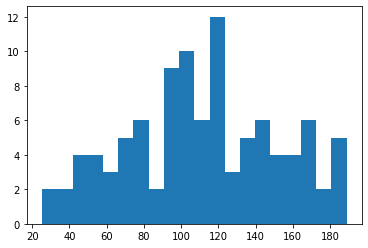

In [481]:
F2_genotype_TF = F2_genotype != F2_genotype.iloc[0, :]
phenotypes = []
for i in range(F2_num):
    phenotypes.append(100 + sum(effects[F2_genotype_TF.iloc[i+1, :].values]))
plt.hist(phenotypes, bins=20)

In [482]:
with open("low_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[:10]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")
        
with open("high_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[-10:]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")

In [483]:
import os
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 low_10_F2_genome.fa reads2/low_bulked_read1.fastq reads2/low_bulked_read2.fastq')
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 high_10_F2_genome.fa reads2/high_bulked_read1.fastq reads2/high_bulked_read2.fastq')

0